### Set up workspace

In [5]:
import sys
sys.path.append('../')

In [2]:
######################## Load modules ###################################
%matplotlib inline
import importlib
import time
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from plants_and_TCR.analysis_parameters import directory_information
from plants_and_TCR.analyze_data import make_tcr_dataset
from plants_and_TCR.process_data import calculate_tcr_time_series
from plants_and_TCR.generate_figures import plot_scatter_CMIP

####################### Set up directory structure ######################
PATH_REGRIDDED_DATA = directory_information.DIR_PROCESSED_DATA
PATH_FIGURES = directory_information.DIR_OUTPUT_FIGURES

In [3]:
# Load precalculated
DIR_TCR_DICT = directory_information.DIR_TCR_DICT
TCR_DICT = pickle.load(open(DIR_TCR_DICT+'TCR_dict.pickle', "rb"))

### Calculate TCRs

In [4]:
END_YR=70
globalTCR = make_tcr_dataset.make_tcr_dataset(TCR_DICT,
                                              end_yr=END_YR,
                                              varname='tas',
                                              average_type='global',
                                              tcr_types=['RAD','TOT','TOT-RAD','PHYS'])

landTCR = make_tcr_dataset.make_tcr_dataset(TCR_DICT,
                                              end_yr=END_YR,
                                              varname='tas',
                                              average_type='land',
                                              tcr_types=['RAD','TOT','TOT-RAD','PHYS'])

### Figure S2

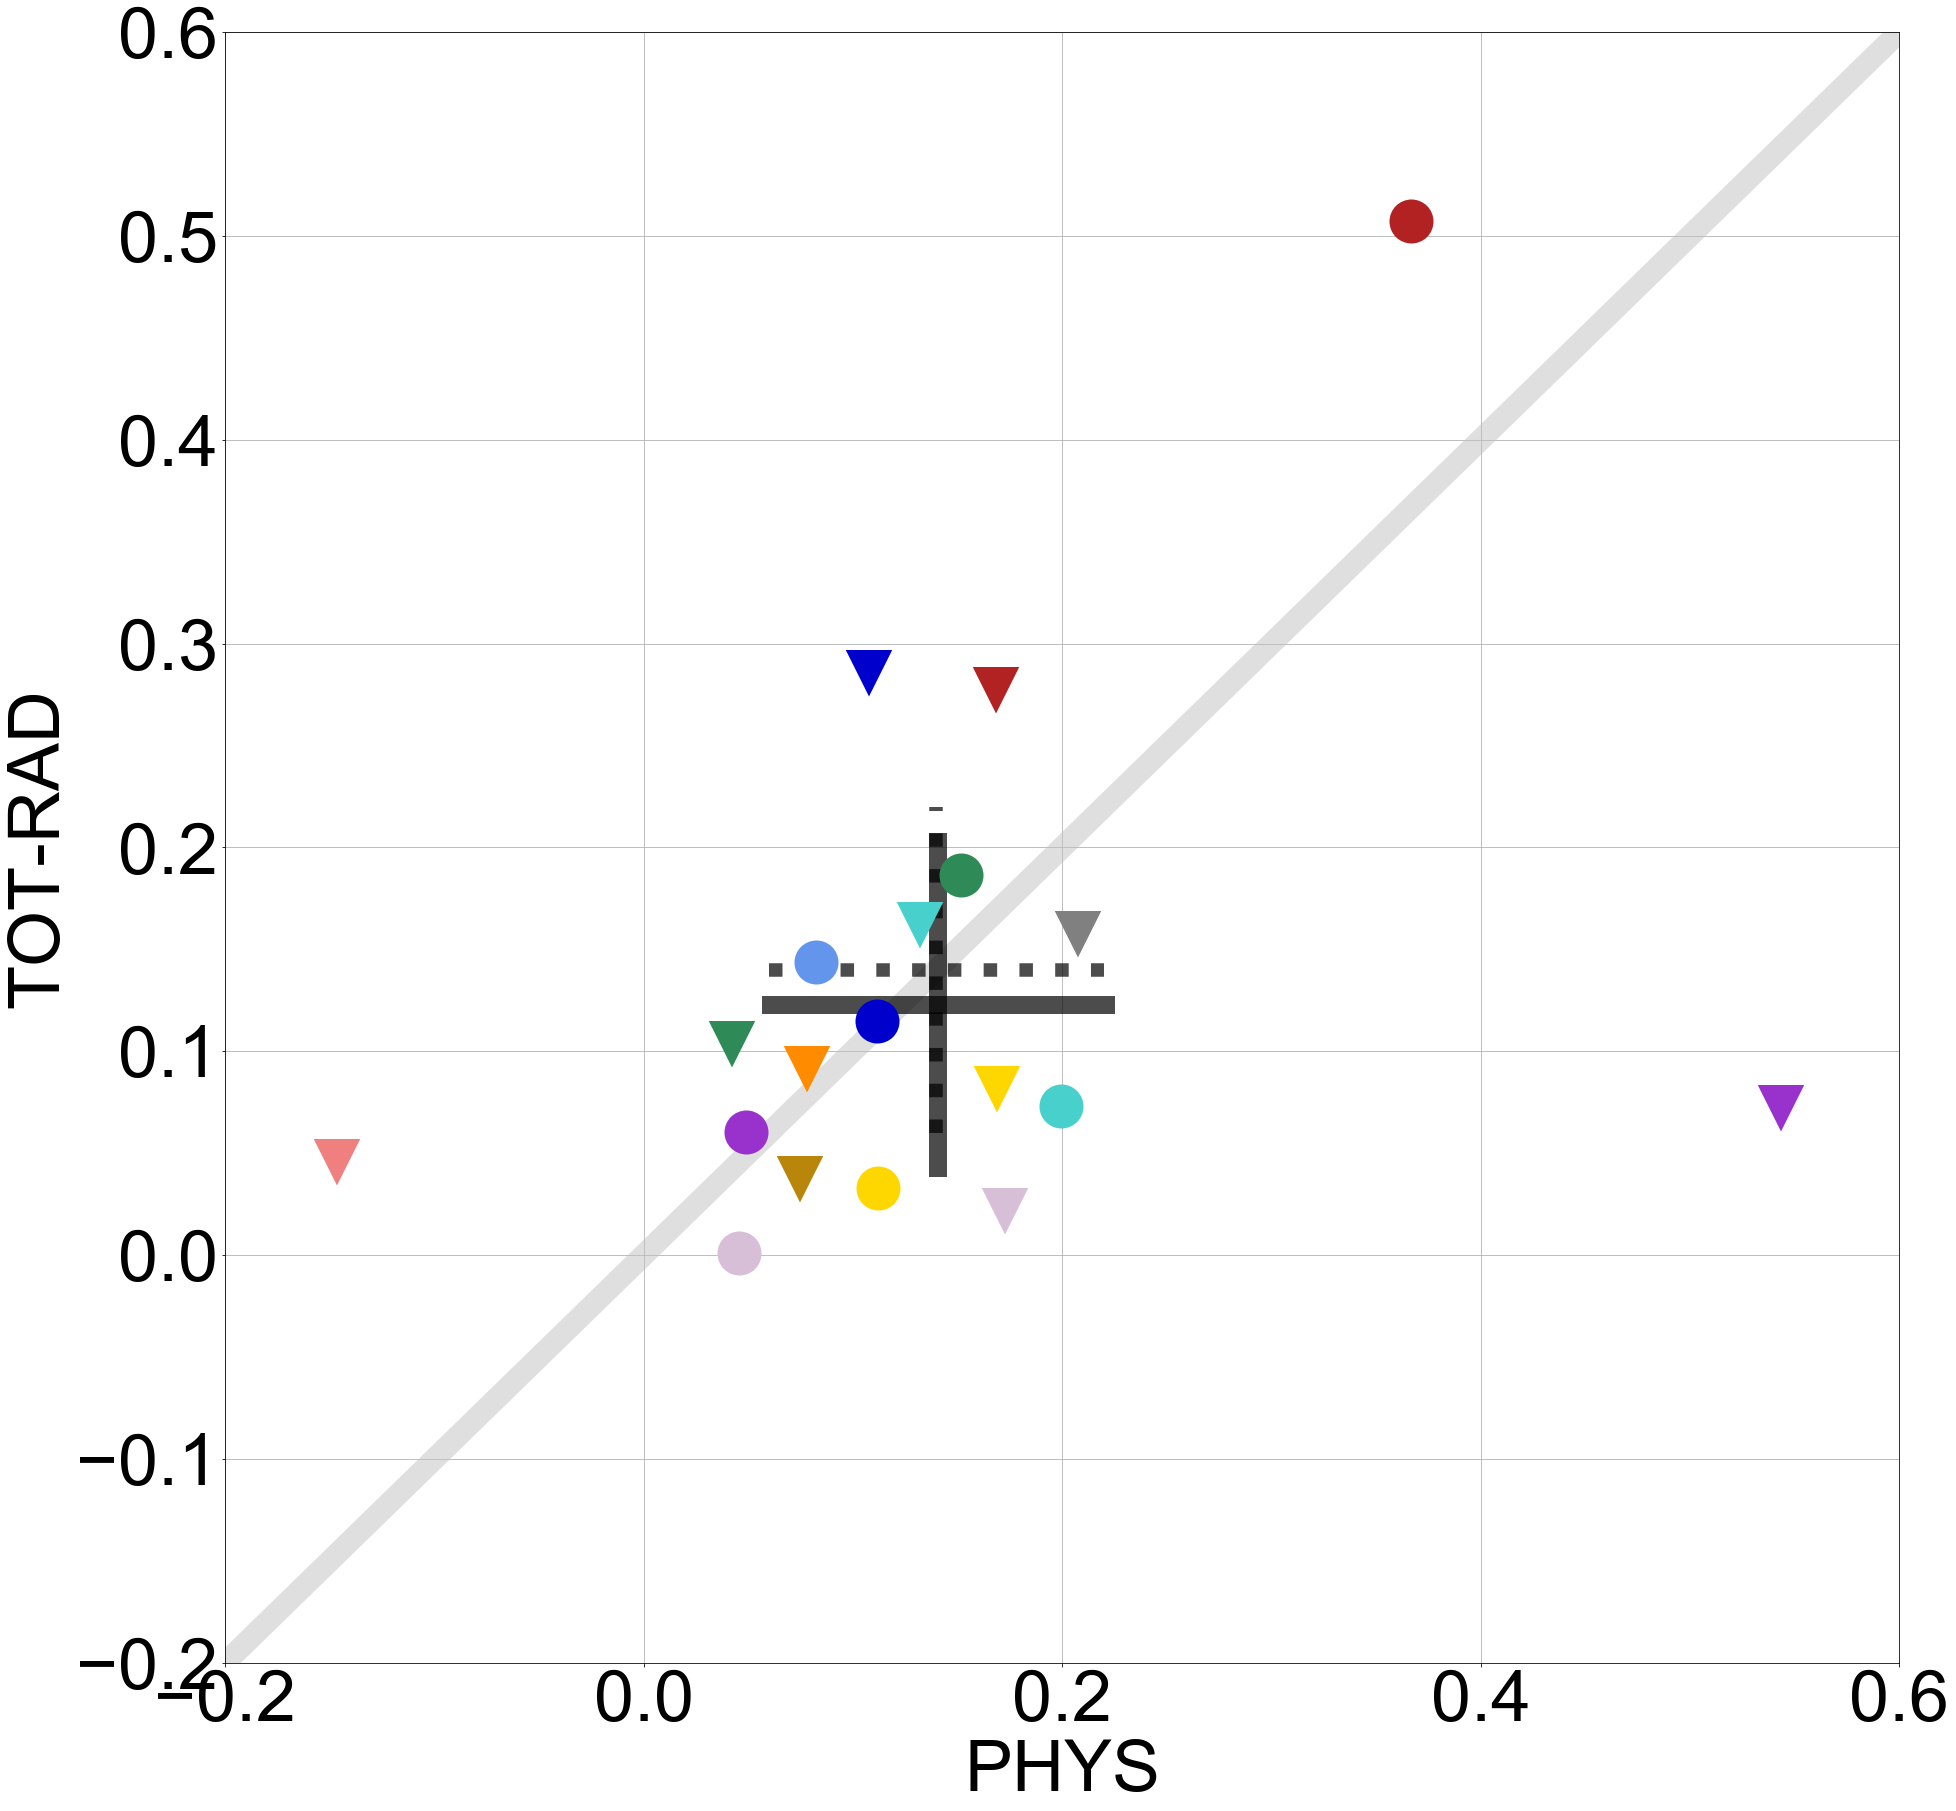

In [10]:
xvals = globalTCR['PHYS'].values
yvals = globalTCR['TOT-RAD'].values

XLIMS = [-0.2,0.6];
YLIMS = [-0.2,0.6];
XLABEL = 'PHYS';
YLABEL = 'TOT-RAD';
plot_scatter_CMIP.plot_scatter_CMIP(xvals, yvals,
                                    one_to_one_line=True,
                                    xlims=XLIMS, ylims=YLIMS,
                                    xlabel=XLABEL, ylabel=YLABEL,
                                    legend_on=False, filled=True, 
                                    markersize=40, fig_dims=[30,30],
                                    filepath=PATH_FIGURES+'Fig_S2a')

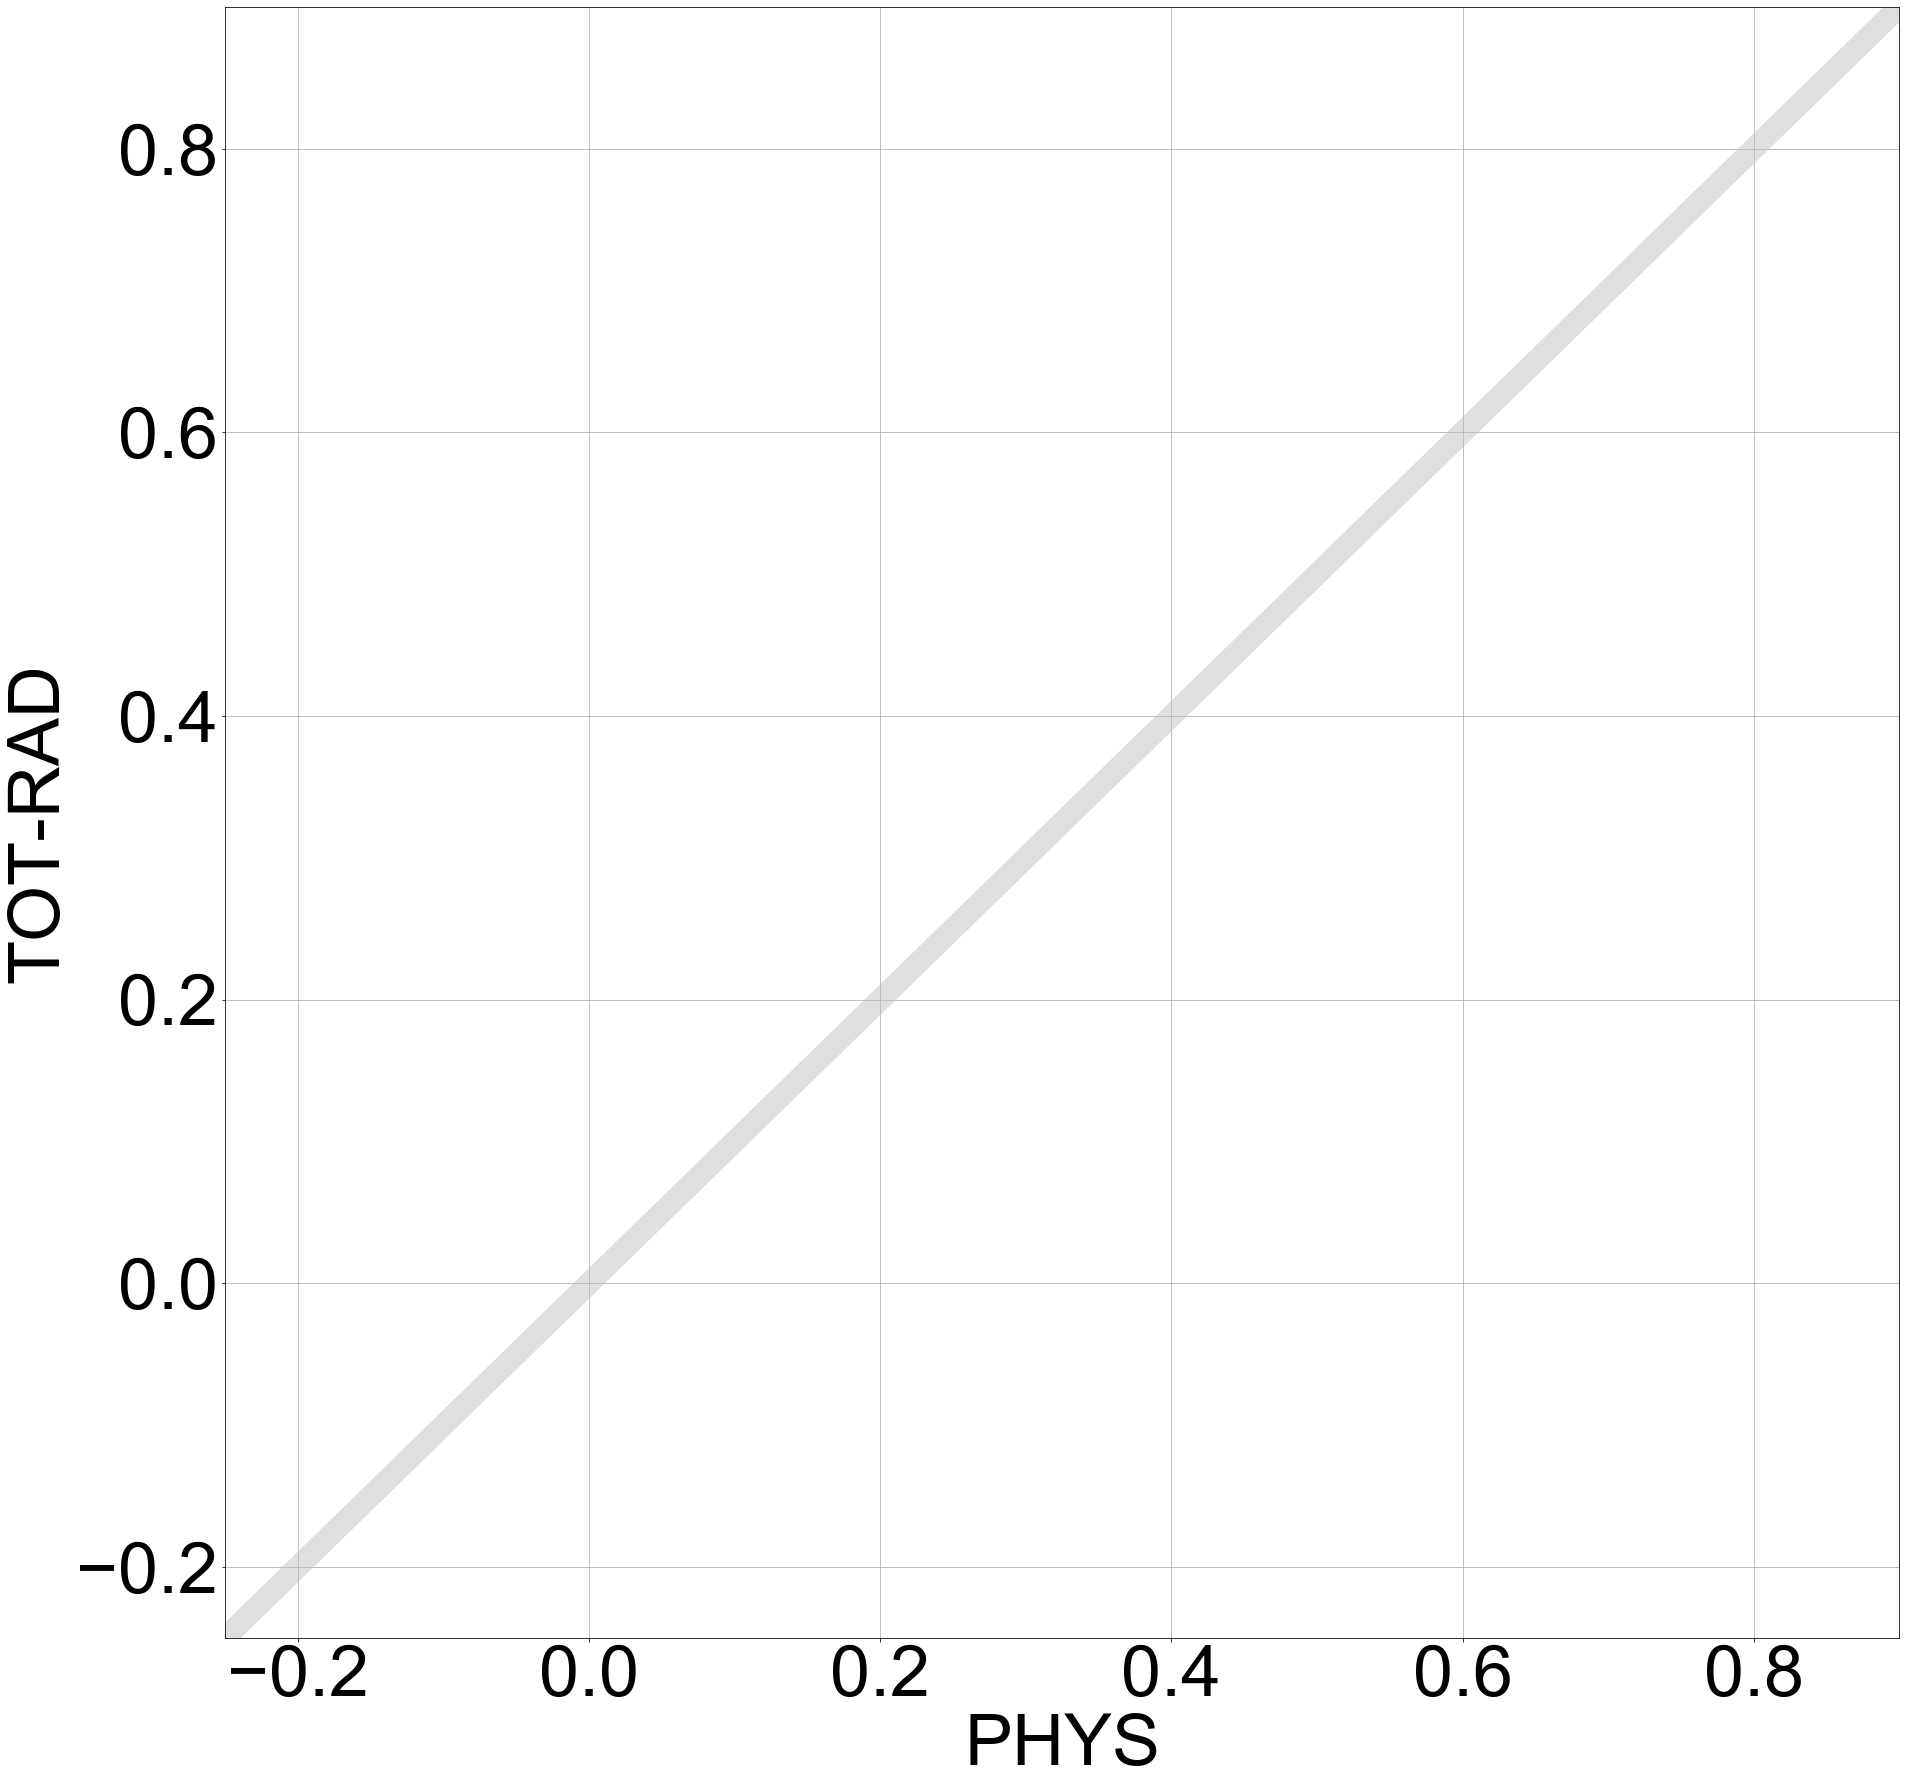

In [9]:
xvals = landTCR['PHYS'].values
yvals = landTCR['TOT-RAD'].values

XLIMS = [-0.25,0.9];
YLIMS = [-0.25,0.9];
XLABEL = 'PHYS';
YLABEL = 'TOT-RAD';
plot_scatter_CMIP.plot_scatter_CMIP(xvals, yvals,
                                    one_to_one_line=True,
                                    xlims=XLIMS, ylims=YLIMS,
                                    xlabel=XLABEL, ylabel=YLABEL,
                                    markersize=40, fig_dims=[30,30],
                                    legend_on=False, filled=True,
                                    filepath=PATH_FIGURES+'Fig_S2b')